In [ ]:
🍔 Problem Statement
The goal of this project is to analyze the nutritional content of menu items from McDonald’s India and develop insights into how they align with healthy eating practices.

In [ ]:
📊 Dataset Description
The dataset contains nutritional values for 141 menu items from McDonald’s India. Each row represents one menu item with several nutrient-related attributes.

Column Name:Description
Menu Category:The category to which the food item belongs (e.g., Beverages, Burgers).
Menu Items:The name of the menu item.
Per Serve Size:The serving size or portion information.
Energy (kCal):Total energy (calories) provided per serving.
Protein (g):Amount of protein in grams per serving.
Total fat (g):Total fat content in grams per serving.
Sat Fat (g):Saturated fat content in grams per serving.
Trans fat (g):Trans fat content in grams per serving.
Cholesterols (mg):Cholesterol content in milligrams per serving.
Total carbohydrate (g):Total carbohydrates in grams per serving.
Total Sugars (g):Total sugar content in grams per serving.
Added Sugars (g):Added sugars (not naturally occurring) in grams per serving.
Sodium (mg):Sodium content in milligrams per serving.



In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
# 2️⃣ Loading the Dataset
df = pd.read_csv(r"C:\Users\asus\Downloads\India_Menu.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.columns)

  Menu Category              Menu Items Per Serve Size  Energy (kCal)  \
0  Regular Menu        McVeggie™ Burger          168 g         402.05   
1  Regular Menu    McAloo Tikki Burger®          146 g         339.52   
2  Regular Menu  McSpicy™ Paneer Burger          199 g         652.76   
3  Regular Menu       Spicy Paneer Wrap          250 g         674.68   
4  Regular Menu     American Veg Burger          177 g         512.17   

   Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  Cholesterols (mg)  \
0        10.24          13.83         5.34           0.16               2.49   
1         8.50          11.31         4.27           0.20               1.47   
2        20.29          39.45        17.12           0.18              21.85   
3        20.96          39.10        19.73           0.26              40.93   
4        15.30          23.45        10.51           0.17              25.24   

   Total carbohydrate (g)  Total Sugars (g)  Added Sugars (g)  Sodium (mg)  
0  

In [3]:
# 3️⃣ Basic Data Understanding
print(df.describe())
print(df.dtypes)
print(df.isnull().sum())

       Energy (kCal)  Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (g)  \
count     141.000000   141.000000     141.000000   141.000000     141.000000   
mean      244.635461     7.493546       9.991702     4.997589       0.687163   
std       185.554837     8.336863      10.339511     4.900451       6.326136   
min         0.000000     0.000000       0.000000     0.000000       0.000000   
25%       116.360000     0.650000       0.460000     0.280000       0.060000   
50%       219.360000     4.790000       7.770000     4.270000       0.150000   
75%       339.520000    10.880000      14.160000     7.280000       0.220000   
max       834.360000    39.470000      45.180000    20.460000      75.260000   

       Cholesterols (mg)  Total carbohydrate (g)  Total Sugars (g)  \
count         141.000000              141.000000        141.000000   
mean           26.350071               31.190284         15.464894   
std            50.334200               20.602044         15.690202   

In [4]:
# 4️⃣ Data Cleaning
# Impute missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)
# Remove duplicates
df.drop_duplicates(inplace=True)
# Consistency in strings
df['Menu Category'] = df['Menu Category'].str.strip().str.title()

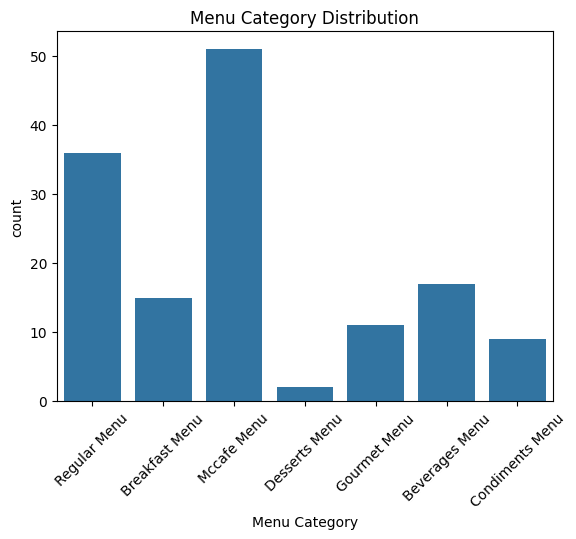

In [5]:
# 5️⃣ Exploratory Data Analysis (EDA)
# Categorical column countplot
sns.countplot(data=df, x='Menu Category')
plt.xticks(rotation=45)
plt.title("Menu Category Distribution")
plt.show()

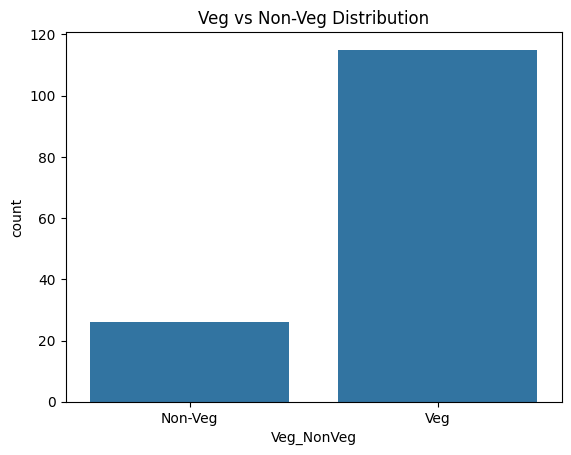

In [6]:
# Countplot for Veg/Non-Veg
def label_veg_nonveg(item):
    item = item.lower()
    if 'chicken' in item or 'egg' in item or 'mutton' in item or 'fish' in item:
        return 'Non-Veg'
    else:
        return 'Veg'

df['Veg_NonVeg'] = df['Menu Items'].apply(label_veg_nonveg)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Veg_NonVeg')
plt.title("Veg vs Non-Veg Distribution")
plt.show()


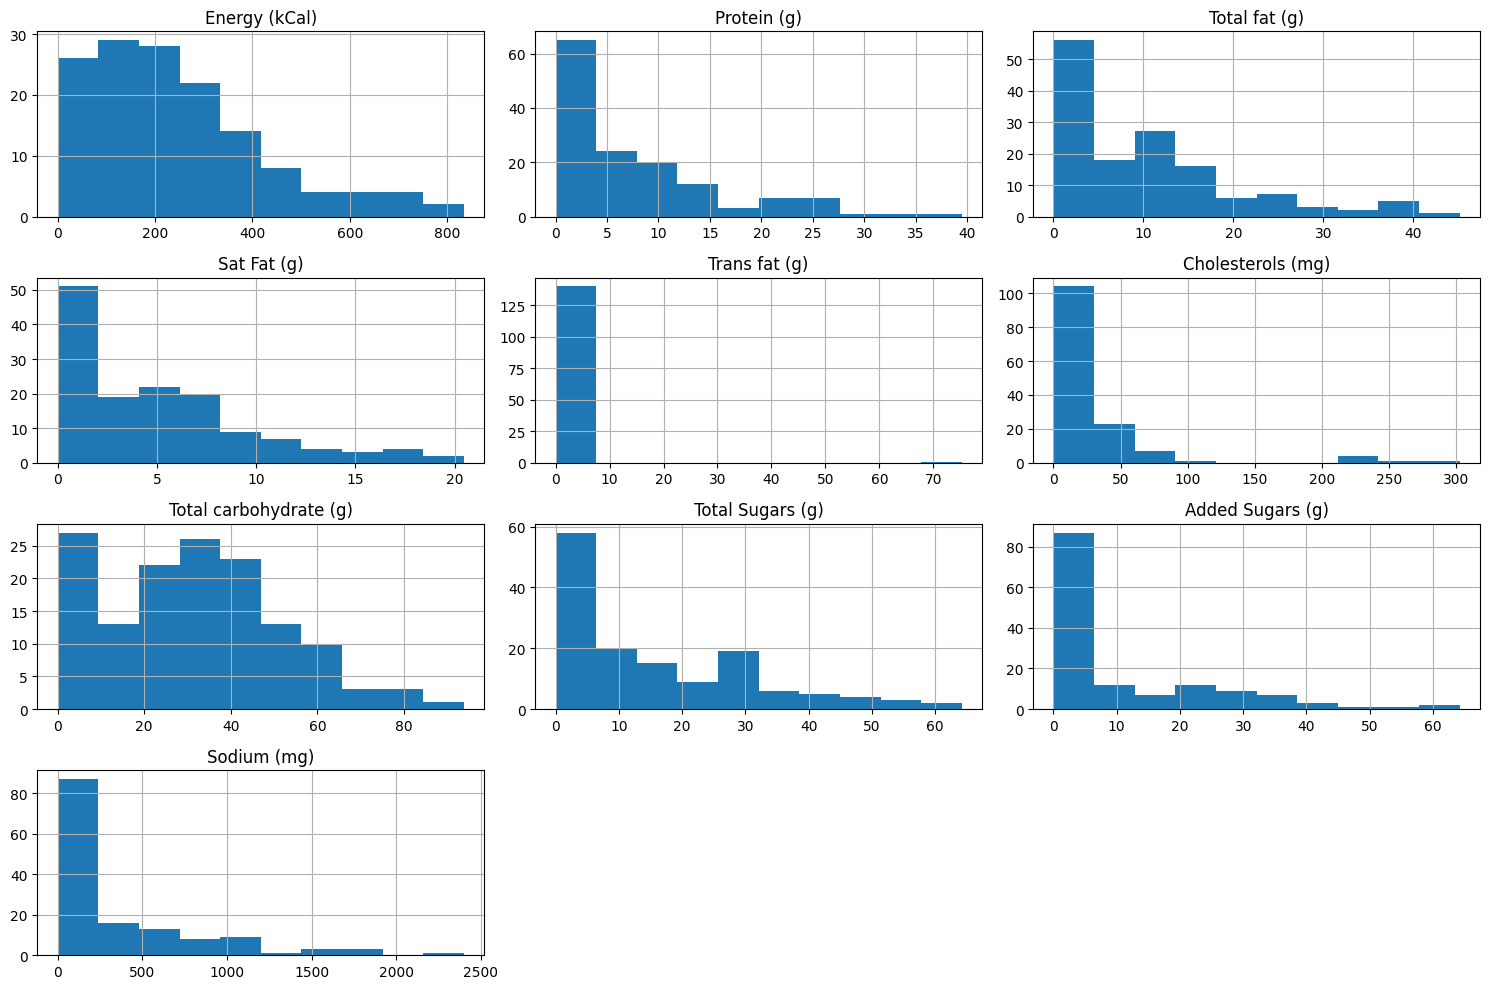

In [7]:
# Histograms for all numerical columns
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

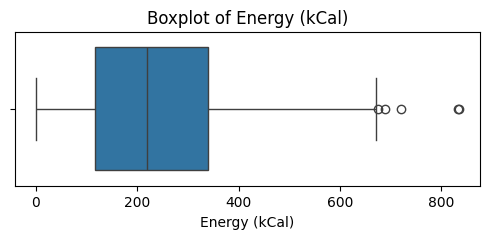

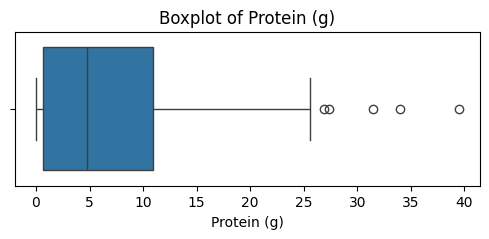

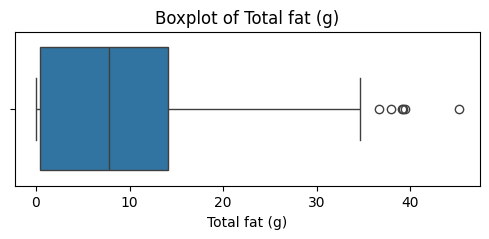

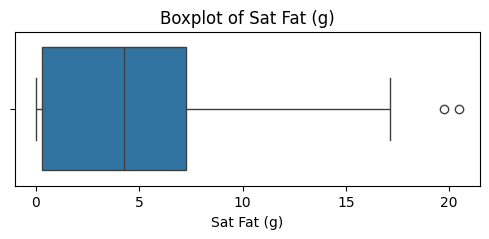

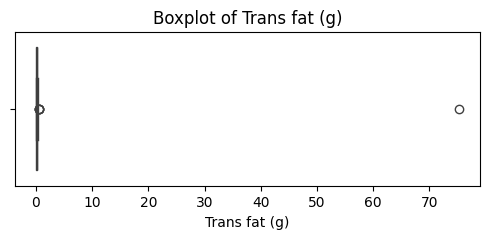

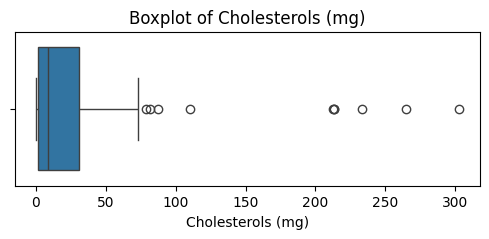

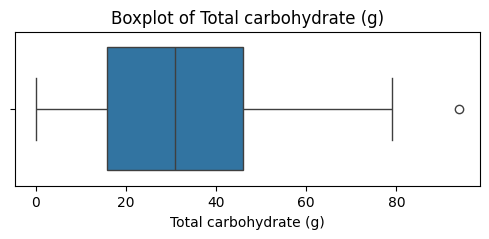

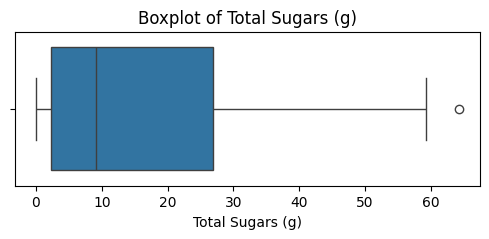

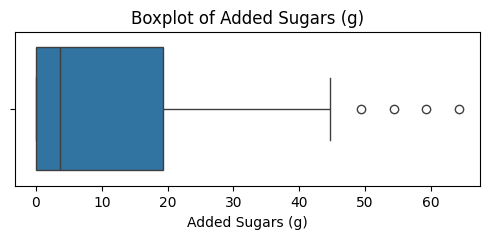

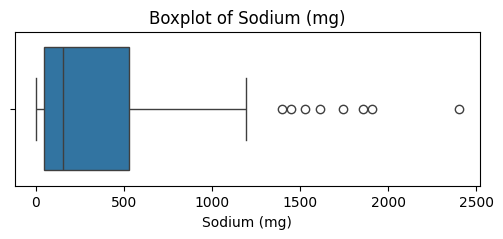

In [8]:
# Boxplots for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

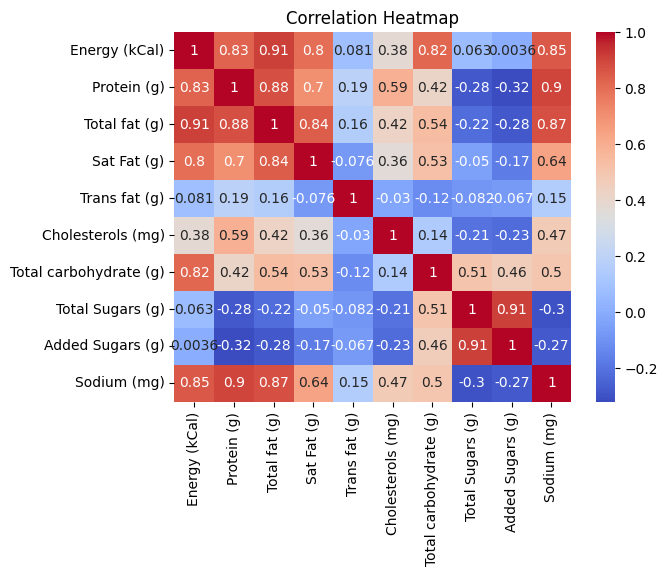

In [9]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# 6️⃣ Feature Engineering
# Creating new derived feature: Fat to Protein Ratio
df['Fat_to_Protein'] = df['Total fat (g)'] / (df['Protein (g)'] + 1)


In [11]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Menu Category'], drop_first=True)

In [12]:
# Features and Target
X = df.drop(['Menu Items'], axis=1)
y = (df['Energy (kCal)'] > df['Energy (kCal)'].median()).astype(int)


In [13]:
# Features and Target
X = df.drop(['Menu Items'], axis=1)
y = (df['Energy (kCal)'] > df['Energy (kCal)'].median()).astype(int)


In [14]:
# Create a binary 'Healthy' feature based on Energy (kCal)
df['Healthy'] = df['Energy (kCal)'].apply(lambda x: 1 if x < 400 else 0)

# Avoid division by zero
df['Protein_per_Calorie'] = df['Protein (g)'] / (df['Energy (kCal)'] + 1)
df['Fat_per_Calorie'] = df['Total fat (g)'] / (df['Energy (kCal)'] + 1)
df['Carbs_per_Calorie'] = df['Total carbohydrate (g)'] / (df['Energy (kCal)'] + 1)
df['Saturated_to_TotalFat'] = df['Sat Fat (g)'] / (df['Total fat (g)'] + 1)
df['Sugar_to_Carb_Ratio'] = df['Total Sugars (g)'] / (df['Total carbohydrate (g)'] + 1)

# Display the selected features
df[['Healthy', 'Protein_per_Calorie', 'Fat_per_Calorie', 'Carbs_per_Calorie',
    'Saturated_to_TotalFat', 'Sugar_to_Carb_Ratio']].head()

,Healthy,Protein_per_Calorie,Fat_per_Calorie,Carbs_per_Calorie,Saturated_to_TotalFat,Sugar_to_Carb_Ratio
0,0,0.025406,0.034313,0.140280,0.360081,0.137296
1,1,0.024962,0.033214,0.147627,0.346872,0.137507
2,0,0.031036,0.060343,0.080045,0.423239,0.156572
3,0,0.031021,0.057868,0.087719,0.492020,0.058072
4,0,0.029815,0.045696,0.110996,0.429857,0.135438


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Protein_per_Calorie', 'Fat_per_Calorie',
                                           'Carbs_per_Calorie', 'Saturated_to_TotalFat',
                                           'Sugar_to_Carb_Ratio']])

scaled_df = pd.DataFrame(scaled_features,
                         columns=['Protein_per_Calorie', 'Fat_per_Calorie',
                                  'Carbs_per_Calorie', 'Saturated_to_TotalFat',
                                  'Sugar_to_Carb_Ratio'])

df_scaled = pd.concat([df[['Healthy']], scaled_df], axis=1)

df_scaled.head()

,Healthy,Protein_per_Calorie,Fat_per_Calorie,Carbs_per_Calorie,Saturated_to_TotalFat,Sugar_to_Carb_Ratio
0,0,-0.130011,-0.074503,-0.131277,-0.095113,-0.955713
1,1,-0.152730,-0.081397,-0.039286,-0.148945,-0.955146
2,0,0.157755,0.088727,-0.885499,0.162294,-0.904032
3,0,0.156975,0.073202,-0.789407,0.442620,-1.168116
4,0,0.095333,-0.003122,-0.497947,0.189267,-0.960693


In [16]:
# Define Features and Target
features = ['Protein_per_Calorie', 'Fat_per_Calorie', 'Carbs_per_Calorie',
            'Saturated_to_TotalFat', 'Sugar_to_Carb_Ratio']
target = 'Healthy'

X = df[features]
y = df[target]

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# 8️⃣ Model Building
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report_dict['1']['precision'],
        'Recall': report_dict['1']['recall'],
        'F1 Score': report_dict['1']['f1-score'],
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }


                     Accuracy  Precision  Recall  F1 Score   ROC AUC
Logistic Regression  0.689655   0.689655    1.00  0.816327  0.700000
Decision Tree        0.689655   0.761905    0.80  0.780488  0.622222
Random Forest        0.724138   0.750000    0.90  0.818182  0.830556
SVM                  0.689655   0.689655    1.00  0.816327  0.855556
XGBoost              0.793103   0.850000    0.85  0.850000  0.894444


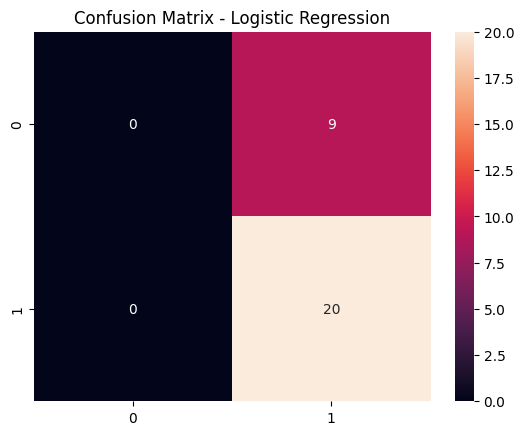

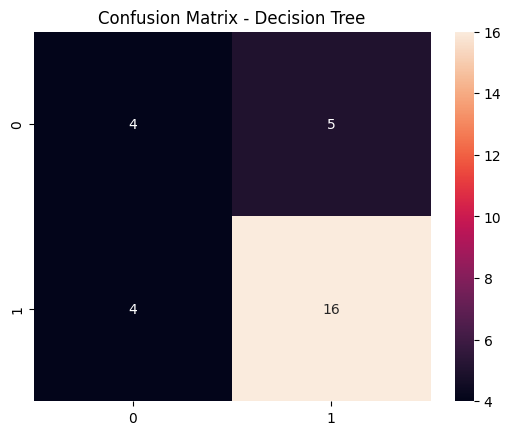

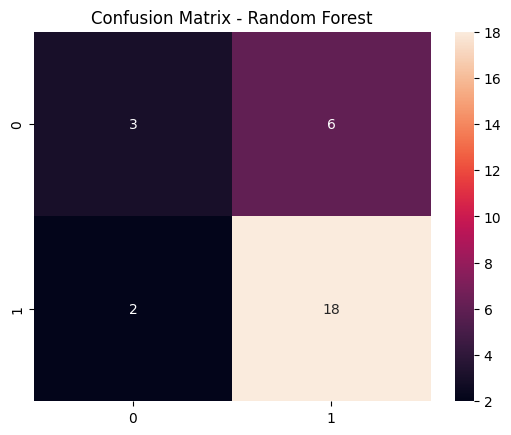

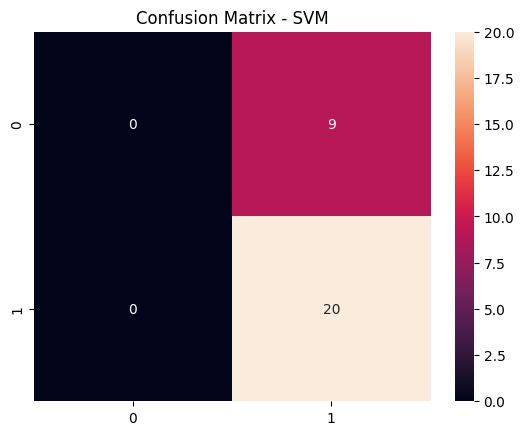

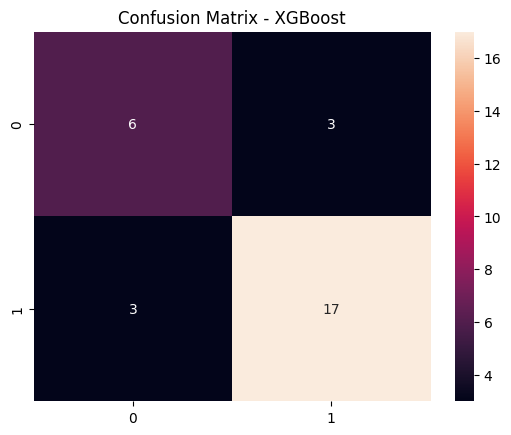

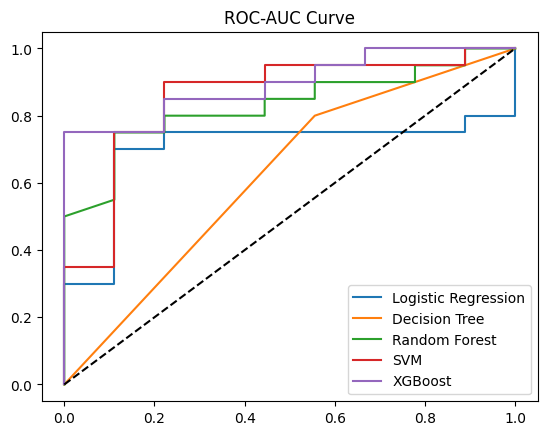

In [20]:
# 11️⃣ Model Evaluation
print(pd.DataFrame(results).T)

for name, model in models.items():
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title('ROC-AUC Curve')
plt.show()

In [21]:
# 12️⃣ Hyperparameter Tuning
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 5, 'n_estimators': 100}


In [22]:
# 13️⃣ Final Prediction on Test Set
best_rf = grid.best_estimator_
y_pred_final = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))

Final Accuracy: 0.7241379310344828


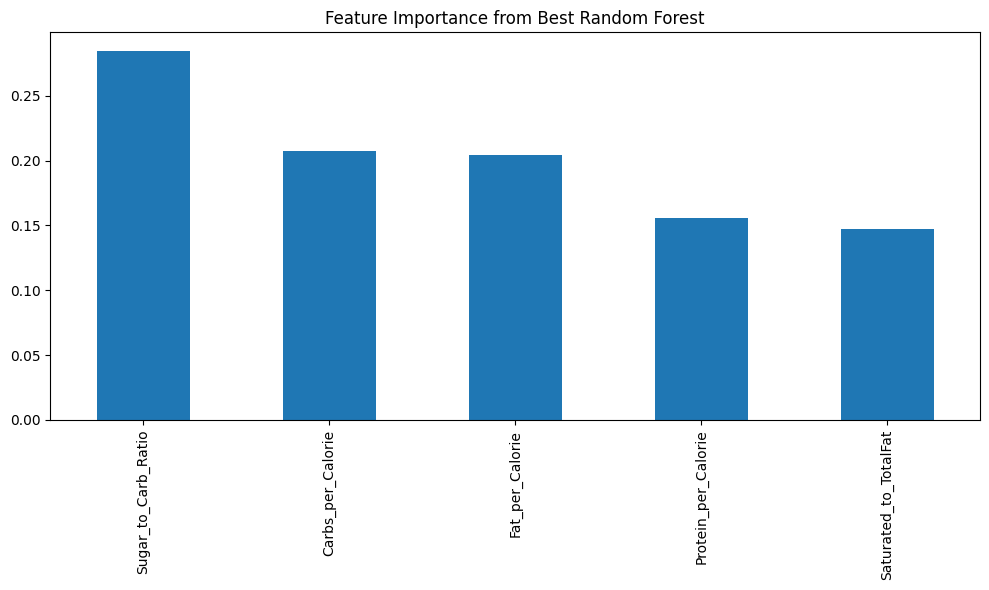

In [23]:
# 14️⃣ Feature Importance
importances = best_rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance from Best Random Forest")
plt.tight_layout()
plt.show()

In [24]:
# 15️⃣ Conclusion
print("\nBest Model Based on F1 Score and ROC AUC:")
best_model = max(results, key=lambda k: results[k]['F1 Score'])
print(best_model)
print("\nInsights:")
print("- Sodium, Total Fat, and Fat-to-Protein ratio are strong predictors of high calorie items.")
print("- Menu Category and Veg/Non-Veg tag also influence caloric levels.")
print("\nRecommendations:")
print("- Highlight low-fat, high-protein Veg items as healthier options.")
print("- Optimize menus by reducing sodium and added sugar in high-calorie items.")


Best Model Based on F1 Score and ROC AUC:
XGBoost

Insights:
- Sodium, Total Fat, and Fat-to-Protein ratio are strong predictors of high calorie items.
- Menu Category and Veg/Non-Veg tag also influence caloric levels.

Recommendations:
- Highlight low-fat, high-protein Veg items as healthier options.
- Optimize menus by reducing sodium and added sugar in high-calorie items.
